In [13]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# change current working directory
import os
os.chdir('/content/drive/MyDrive/Synosis Project 1')

In [15]:
# check we can see the datasets

# datasets that are useful for testing classifiers
os.path.isfile('train-metadata V2.csv')

True

In [16]:
# k-nearest neighbours (k-NN) classifier calling code

# data preparation steps

# Importing the packages we use
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Loading all the observations
observations = pd.read_csv('train-metadata V2.csv')
observations = observations.dropna()
# Shuffling all the observations
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
observations_test = observations_shuffled.iloc[:split_index]
observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
test_examples = observations_test.drop(columns='target').to_numpy()
test_labels = observations_test['target'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
train_examples = observations_train.drop(columns='target').to_numpy()
train_labels = observations_train['target'].to_numpy()

# model training and model evaluation steps

# Create a list of K and its accuracy

kList = []
accList = []



# Set verbose for avoiding results flooding

verbose = True

for i in range (1,20):

  # Create a k-NN classifier in 1-20 nearest neighbours
  model = KNeighborsClassifier(n_neighbors=i)

  # Call the model's fitting algorithm, passing in our training examples and training labels
  model.fit(train_examples, train_labels)

  # Use the trained model to generate predictions for our testing examples
  predictions = model.predict(test_examples)

  # Find the total number of model predictions that matched with the corresponding testing labels
  correct_predictions = sum(predictions == test_labels)

  # Calculate the model's accuracy: the fraction of predictions that were correct
  accuracy = correct_predictions / len(test_labels)

  # Display the accuracy as a single quantitative measure of overall performance
  print("Accuracy (scikit-learn implementation):", accuracy, "(or", round(accuracy*100, 1), "%)")

  if verbose:

      print("K = ", i)
      print()
      #append the results into the lists
      kList.append(i)
      accList.append(accuracy)





Accuracy (scikit-learn implementation): 0.6170212765957447 (or 61.7 %)
K =  1

Accuracy (scikit-learn implementation): 0.5904255319148937 (or 59.0 %)
K =  2

Accuracy (scikit-learn implementation): 0.6170212765957447 (or 61.7 %)
K =  3

Accuracy (scikit-learn implementation): 0.6117021276595744 (or 61.2 %)
K =  4

Accuracy (scikit-learn implementation): 0.601063829787234 (or 60.1 %)
K =  5

Accuracy (scikit-learn implementation): 0.6436170212765957 (or 64.4 %)
K =  6

Accuracy (scikit-learn implementation): 0.6170212765957447 (or 61.7 %)
K =  7

Accuracy (scikit-learn implementation): 0.6170212765957447 (or 61.7 %)
K =  8

Accuracy (scikit-learn implementation): 0.6063829787234043 (or 60.6 %)
K =  9

Accuracy (scikit-learn implementation): 0.6329787234042553 (or 63.3 %)
K =  10

Accuracy (scikit-learn implementation): 0.6170212765957447 (or 61.7 %)
K =  11

Accuracy (scikit-learn implementation): 0.6223404255319149 (or 62.2 %)
K =  12

Accuracy (scikit-learn implementation): 0.60106382

In [17]:
Matrix1= confusion_matrix(predictions, test_labels)
Matrix1

array([[61, 50],
       [31, 46]])

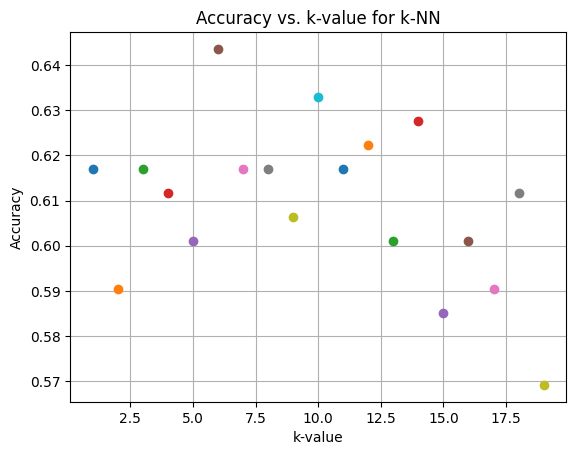

In [18]:
# Show evaluation results graphically
plt.figure()
plt.plot([kList], [accList], marker='o', linestyle='-')
plt.title('Accuracy vs. k-value for k-NN')
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [19]:
# work with a naive Bayes classifier

# data preparation steps

# Importing the packages we use
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns


# Loading all the observations
observations = pd.read_csv('train-metadata V2.csv')
observations = observations.dropna()

# Shuffling all the observations
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
observations_test = observations_shuffled.iloc[:split_index]
observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
test_examples = observations_test.drop(columns='target').to_numpy()
test_labels = observations_test['target'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
train_examples = observations_train.drop(columns='target').to_numpy()
train_labels = observations_train['target'].to_numpy()

# model training and model evaluation steps

# Create a dummy classifier for now
model = GaussianNB()

# Call the model's fitting algorithm, passing in our training examples and training labels
model.fit(train_examples, train_labels)


# Use the trained model to generate predictions for our testing examples
predictions = model.predict(test_examples)

# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == test_labels)

# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(test_labels)

# Display the accuracy as a single quantitative measure of overall performance

print("Accuracy (scikit-learn implementation):", accuracy, "(or", round(accuracy*100, 1), "%)")

Matrix= confusion_matrix(predictions, test_labels)
Matrix


Accuracy (scikit-learn implementation): 0.8191489361702128 (or 81.9 %)


array([[84, 26],
       [ 8, 70]])

Accuracy (scikit-learn implementation): 0.8882978723404256 (or 88.8 %)
[[85  7]
 [14 82]]
Feature Importance in Decision Tree:
                         Feature  Importance
10                      tbp_lv_H    0.326356
3         clin_size_long_diam_mm    0.244097
27             tbp_lv_norm_color    0.152094
28            tbp_lv_perimeterMM    0.070691
35                      tbp_lv_y    0.065657
24            tbp_lv_minorAxisMM    0.039031
37  tbp_lv_dnn_lesion_confidence    0.030435
21            tbp_lv_deltaLBnorm    0.023530
31                tbp_lv_stdLExt    0.014139
25        tbp_lv_nevi_confidence    0.013421
20                tbp_lv_deltaLB    0.008844
17                 tbp_lv_deltaA    0.007964
34                      tbp_lv_x    0.002808
36                      tbp_lv_z    0.000933
32             tbp_lv_symm_2axis    0.000000
30                   tbp_lv_stdL    0.000000
29   tbp_lv_radial_color_std_max    0.000000
33       tbp_lv_symm_2axis_angle    0.000000
26            tbp_

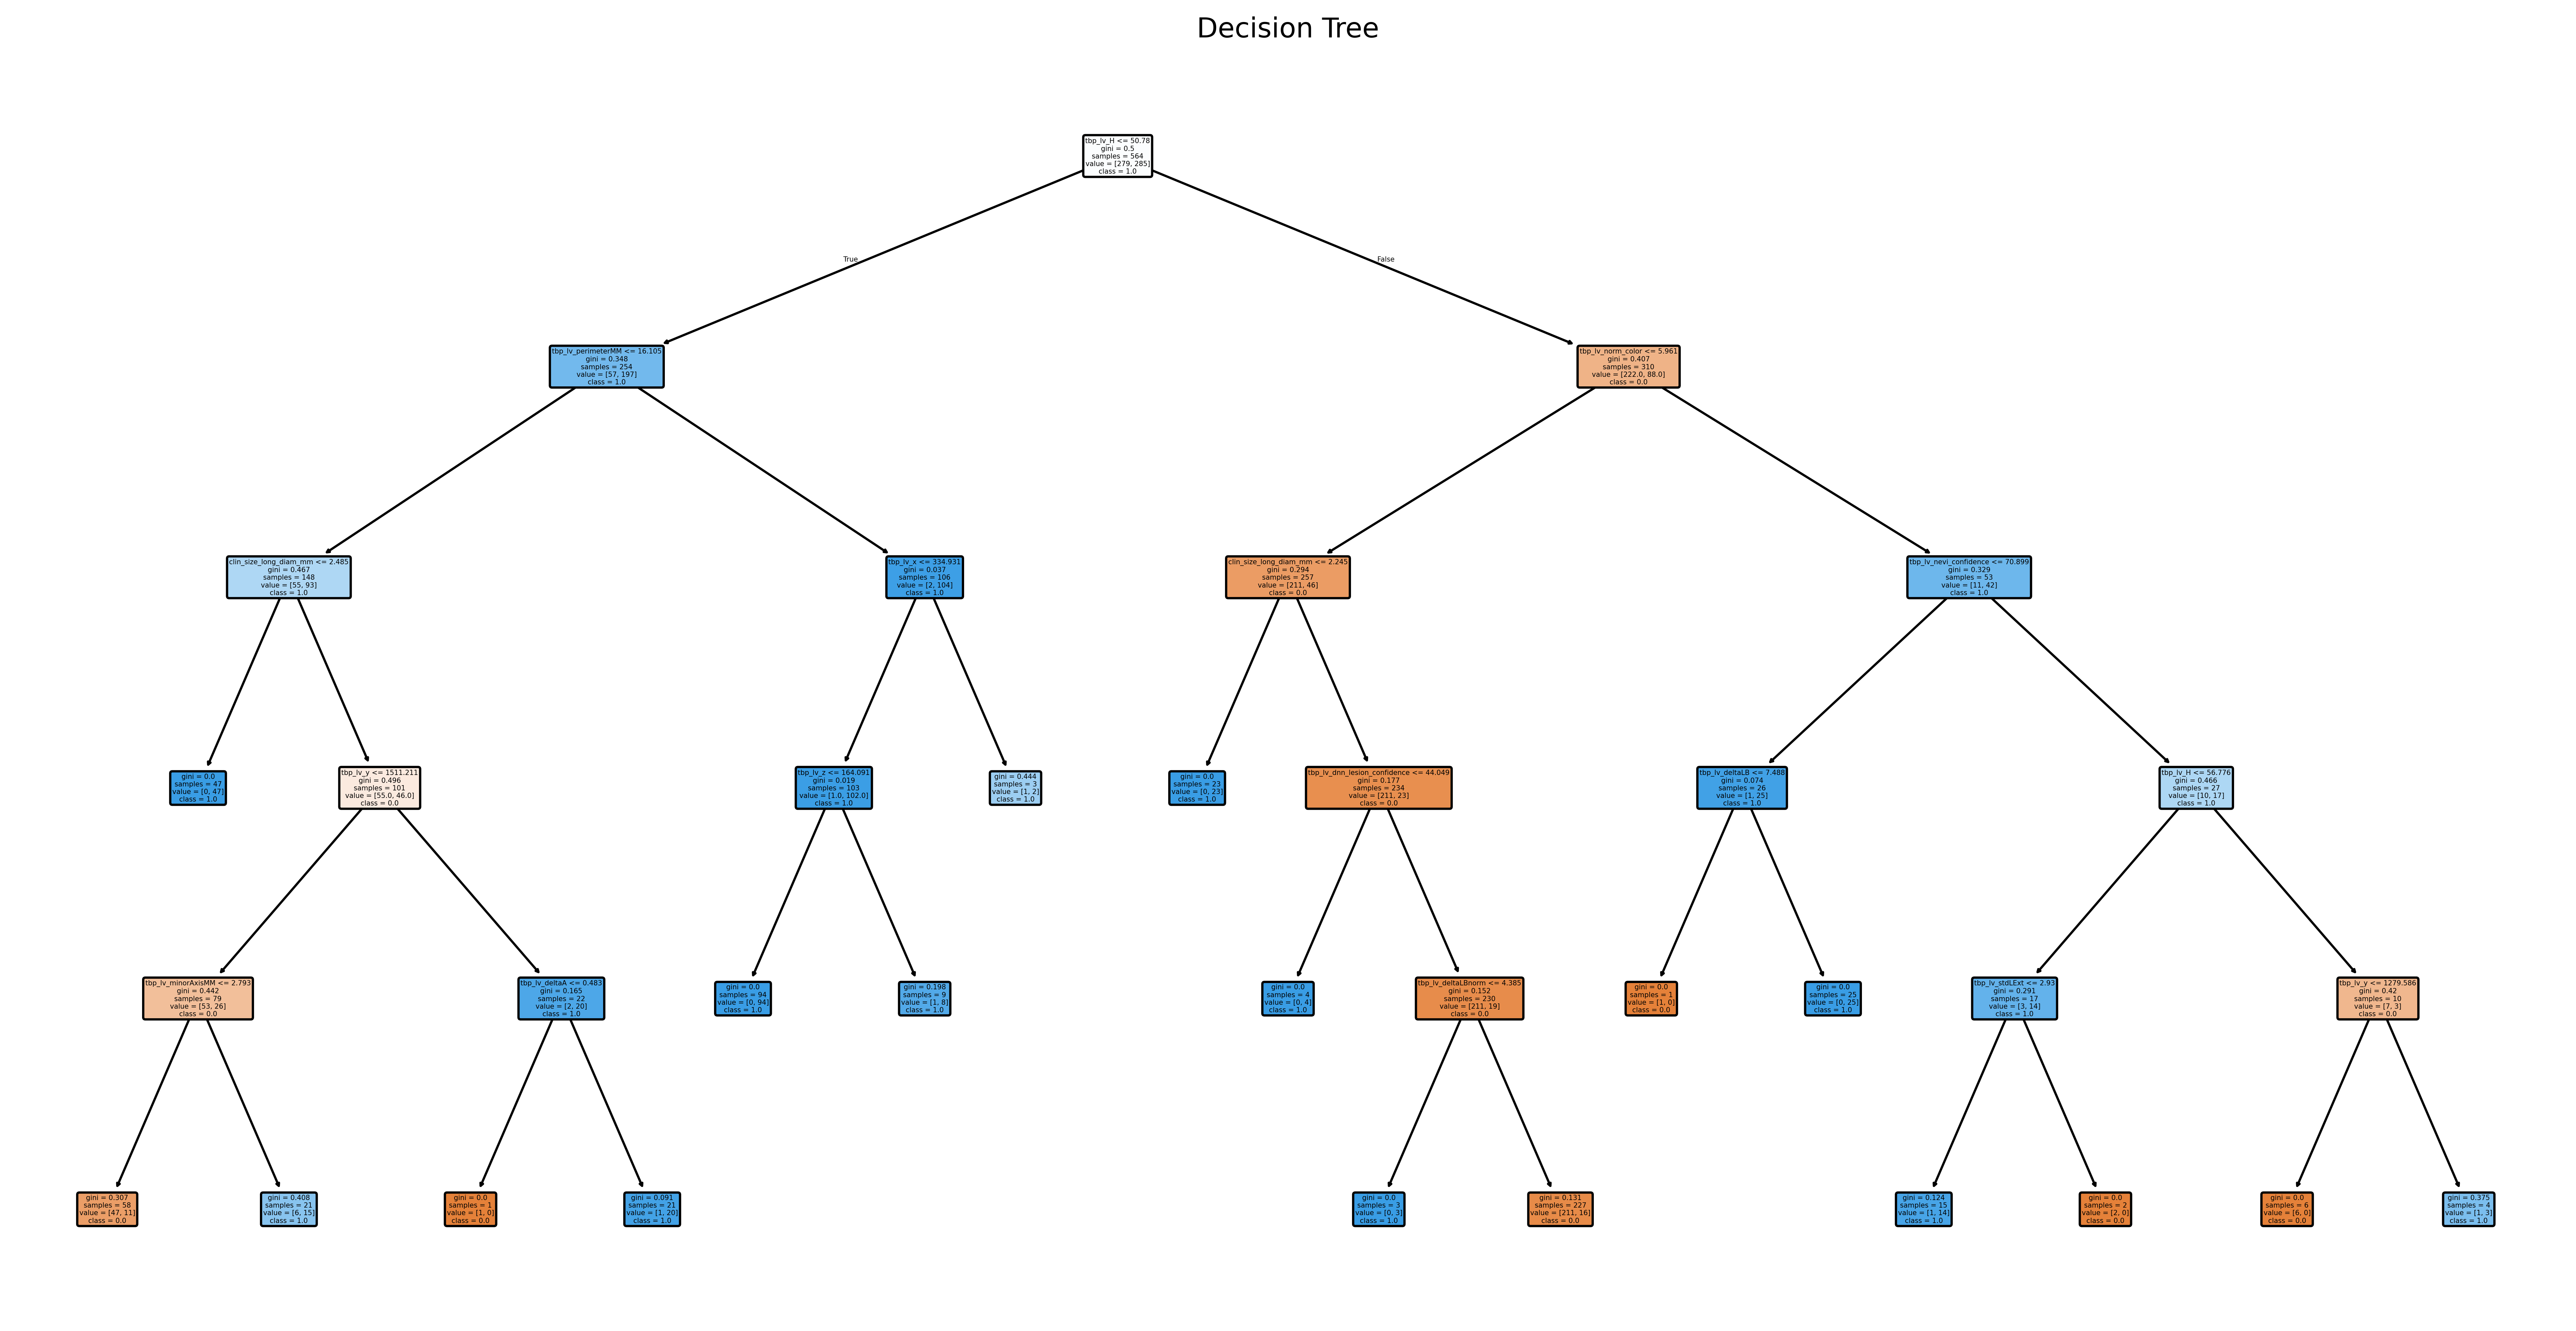

Node 0:
  - Splitting on feature tbp_lv_H with threshold 50.7797
  - Left child: Node 1
  - Right child: Node 16
  - Number of samples at node: 564
  - Impurity: 0.4999

Node 1:
  - Splitting on feature tbp_lv_perimeterMM with threshold 16.1053
  - Left child: Node 2
  - Right child: Node 11
  - Number of samples at node: 254
  - Impurity: 0.3481

Node 2:
  - Splitting on feature clin_size_long_diam_mm with threshold 2.4850
  - Left child: Node 3
  - Right child: Node 4
  - Number of samples at node: 148
  - Impurity: 0.4670

Node 3:
  - This is a leaf node.
  - Number of samples at node: 47
  - Impurity: 0.0000

Node 4:
  - Splitting on feature tbp_lv_y with threshold 1511.2107
  - Left child: Node 5
  - Right child: Node 8
  - Number of samples at node: 101
  - Impurity: 0.4960

Node 5:
  - Splitting on feature tbp_lv_minorAxisMM with threshold 2.7932
  - Left child: Node 6
  - Right child: Node 7
  - Number of samples at node: 79
  - Impurity: 0.4416

Node 6:
  - This is a leaf node

In [20]:
# Importing the packages we use
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns

# Loading all the observations
observations = pd.read_csv('train-metadata V2.csv')
observations = observations.dropna()

# Grabbing a copy of the features so we can show the names when plotting the tree
features = observations.columns.drop('target').to_numpy()

# Shuffling all the observations
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
observations_test = observations_shuffled.iloc[:split_index]
observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
test_examples = observations_test.drop(columns='target').to_numpy()
test_labels = observations_test['target'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
train_examples = observations_train.drop(columns='target').to_numpy()
train_labels = observations_train['target'].to_numpy()

# model training and model evaluation steps

# Create a Decision Tree model object and set the minimum parent size hyperparameter to 100:
model = DecisionTreeClassifier(min_samples_split=10, max_depth=5, random_state=99)

# Call the model's fitting algorithm, passing in our training examples and training labels
model.fit(train_examples, train_labels)

# Use the trained model to generate predictions for our testing examples
predictions = model.predict(test_examples)

# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == test_labels)

# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(test_labels)

# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy (scikit-learn implementation):", accuracy, "(or", round(accuracy*100, 1), "%)")

# Generate a confusion matrix
print(confusion_matrix(test_labels, predictions))

tree = model

feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance in Decision Tree:")
print(importance_df)

# show a diagram of the resulting tree structure
plt.figure(figsize=(20, 10), dpi=500)
plot_tree(tree, feature_names=features.tolist(), class_names=[str(class_label) for class_label in model.classes_], filled=True, rounded=True, fontsize=3)
plt.title("Decision Tree")
plt.show()

tree = model.tree_
for node in range(tree.node_count):
    print(f"Node {node}:")
    if tree.children_left[node] == -1 and tree.children_right[node] == -1:
        print("  - This is a leaf node.")
    else:
        print(f"  - Splitting on feature {features[tree.feature[node]]} with threshold {tree.threshold[node]:.4f}")
        print(f"  - Left child: Node {tree.children_left[node]}")
        print(f"  - Right child: Node {tree.children_right[node]}")
    print(f"  - Number of samples at node: {tree.n_node_samples[node]}")
    print(f"  - Impurity: {tree.impurity[node]:.4f}")
    print()


In [21]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Loading all the observations
observations = pd.read_csv('train-metadata V2.csv')
observations = observations.dropna()
# Grabbing a copy of the features so we can show the names when plotting the tree
features = observations.columns.drop('target').to_numpy()

# Shuffling all the observations
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
observations_test = observations_shuffled.iloc[:split_index]
observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
test_examples = observations_test.drop(columns='target').to_numpy()
test_labels = observations_test['target'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
train_examples = observations_train.drop(columns='target').to_numpy()
train_labels = observations_train['target'].to_numpy()

# model training and model evaluation steps

# Create a Decision Tree model object and set the minimum parent size hyperparameter to 100:
model_dt = DecisionTreeClassifier(random_state=99, max_depth=5)
model= BaggingClassifier(model_dt, n_estimators=100, random_state=99)

# Call the model's fitting algorithm, passing in our training examples and training labels
model.fit(train_examples, train_labels)

# Use the trained model to generate predictions for our testing examples
predictions = model.predict(test_examples)

# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == test_labels)

# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(test_labels)

# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy (scikit-learn implementation):", accuracy, "(or", round(accuracy*100, 1), "%)")


tree = model.estimators_[0]  # The first tree in the Bagging Classifier

feature_importance = tree.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance in The First Decision Tree in Bagging Classifier:")
print(importance_df)

plt.figure(figsize=(20, 10), dpi=500)
plot_tree(tree, feature_names=features.tolist(), class_names=[str(class_label) for class_label in model.classes_], filled=True, rounded=True, fontsize=3)
plt.title("The First Decision Tree in Bagging Classifier")
plt.show()

tree = tree.tree_
for node in range(tree.node_count):
    print(f"Node {node}:")
    if tree.children_left[node] == -1 and tree.children_right[node] == -1:
        print("  - This is a leaf node.")
    else:
        print(f"  - Splitting on feature {features[tree.feature[node]]} with threshold {tree.threshold[node]:.4f}")
        print(f"  - Left child: Node {tree.children_left[node]}")
        print(f"  - Right child: Node {tree.children_right[node]}")
    print(f"  - Number of samples at node: {tree.n_node_samples[node]}")
    print(f"  - Impurity: {tree.impurity[node]:.4f}")
    print()


tree = model.estimators_[1]  # The second tree in the Bagging Classifier


feature_importance = tree.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance in The Second Decision Tree in Bagging Classifier:")
print(importance_df)

plt.figure(figsize=(20, 10), dpi=500)
plot_tree(tree, feature_names=features.tolist(), class_names=[str(class_label) for class_label in model.classes_], filled=True, rounded=True, fontsize=3)
plt.title("The Second Decision Tree in Bagging Classifier")
plt.show()



tree = model.estimators_[2]  # The third tree in the Bagging Classifier


feature_importance = tree.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance in The Third Decision Tree in Bagging Classifier:")
print(importance_df)

plt.figure(figsize=(20, 10), dpi=500)
plot_tree(tree, feature_names=features.tolist(), class_names=[str(class_label) for class_label in model.classes_], filled=True, rounded=True, fontsize=3)
plt.title("The Third Decision Tree in Bagging Classifier")
plt.show()




Output hidden; open in https://colab.research.google.com to view.

In [24]:
# Random Forest calling code

from sklearn.ensemble import RandomForestClassifier

# Loading all the observations
observations = pd.read_csv('train-metadata V2.csv')
observations = observations.dropna()
# Grabbing a copy of the features so we can show the names when plotting the tree
#features = observations.columns.drop('species').to_numpy()

# Shuffling all the observations
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
observations_test = observations_shuffled.iloc[:split_index]
observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
test_examples = observations_test.drop(columns='target').to_numpy()
test_labels = observations_test['target'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
train_examples = observations_train.drop(columns='target').to_numpy()
train_labels = observations_train['target'].to_numpy()

# model training and model evaluation steps

# Create a Decision Tree model object and set the minimum parent size hyperparameter to 100:
model = RandomForestClassifier(random_state=99, max_depth=6)

# Call the model's fitting algorithm, passing in our training examples and training labels
model.fit(train_examples, train_labels)

# Use the trained model to generate predictions for our testing examples
predictions = model.predict(test_examples)

# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == test_labels)

# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(test_labels)

# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy (scikit-learn implementation):", accuracy, "(or", round(accuracy*100, 1), "%)")

tree = model.estimators_[0]  # The first tree in the forest

feature_importance = tree.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance in The First Decision Tree in Random Forest:")
print(importance_df)


plt.figure(figsize=(20, 10), dpi=500)
plot_tree(tree, feature_names=features.tolist(), class_names=[str(class_label) for class_label in model.classes_], filled=True, rounded=True, fontsize=3)
plt.title("The First Decision Tree in Random Forest")
plt.show()

tree = tree.tree_
for node in range(tree.node_count):
    print(f"Node {node}:")
    if tree.children_left[node] == -1 and tree.children_right[node] == -1:
        print("  - This is a leaf node.")
    else:
        print(f"  - Splitting on feature {features[tree.feature[node]]} with threshold {tree.threshold[node]:.4f}")
        print(f"  - Left child: Node {tree.children_left[node]}")
        print(f"  - Right child: Node {tree.children_right[node]}")
    print(f"  - Number of samples at node: {tree.n_node_samples[node]}")
    print(f"  - Impurity: {tree.impurity[node]:.4f}")
    print()



tree = model.estimators_[1]  # The second tree in the forest

feature_importance = tree.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance in The Second Decision Tree in Random Forest:")
print(importance_df)


plt.figure(figsize=(20, 10), dpi=500)
plot_tree(tree, feature_names=features.tolist(), class_names=[str(class_label) for class_label in model.classes_], filled=True, rounded=True, fontsize=3)
plt.title("The Second Decision Tree in Random Forest")
plt.show()


tree = model.estimators_[2]  # The third tree in the forest

feature_importance = tree.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance in The Third Decision Tree in Random Forest:")
print(importance_df)

plt.figure(figsize=(20, 10), dpi=500)
plot_tree(tree, feature_names=features.tolist(), class_names=[str(class_label) for class_label in model.classes_], filled=True, rounded=True, fontsize=3)
plt.title("The Third Decision Tree in Random Forest")
plt.show()





Output hidden; open in https://colab.research.google.com to view.

In [23]:
Matrix= confusion_matrix(predictions, test_labels)
Matrix

array([[87, 15],
       [ 5, 81]])